In [1]:
priors = [1 / 3, 1 / 3, 1 / 3]
likelihoods = [0.3, 0.2, 7 / 11]

In [2]:
import numpy as np

np.multiply(priors, likelihoods)

array([0.1       , 0.06666667, 0.21212121])

In [3]:
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [4]:
bayes_rule(priors, likelihoods)

array([0.264, 0.176, 0.56 ])

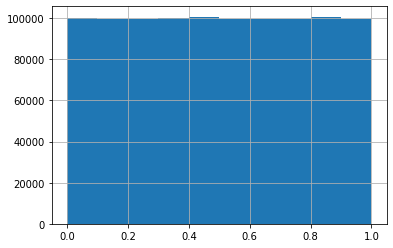

In [22]:
import pandas as pd

%matplotlib inline

n_draws = 1000000
prior = pd.Series(np.random.uniform(0, 1, n_draws))

prior.hist();

In [13]:
n_visits = 50
buyers = 10

In [14]:
def generative_model(probability):
    return np.random.binomial(n_visits, probability)

In [29]:
generative_model(0.5)

27

In [32]:
sim_data = []
for p in prior[:10]:
    print(p)
    print(generative_model(p))
    sim_data.append(generative_model(p))

0.7528890126396437
36
0.7237296937605407
38
0.9815767387656237
49
0.9588984659168044
48
0.449400699023755
22
0.7165710729930799
37
0.6788403390532156
33
0.5268202944716601
24
0.41115957104452583
18
0.9741840604104968
47


In [38]:
%%timeit

sim_data = []
for p in prior:
    sim_data.append(generative_model(p))

1.54 s ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%%timeit
# Max improvements

sim_data = list(map(lambda x: generative_model(x), prior))

1.5 s ± 54.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%%timeit
# Delia improvements

sim_data = list(map(lambda x: np.random.binomial(n_visits, x), prior))

1.37 s ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
%%timeit
# Alberto improvements

sim_data = list(map(generative_model, prior))

1.41 s ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%%timeit
# Pedro improvements

sim_data = [np.random.binomial(n_visits, x) for x in prior]

1.38 s ± 41.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%%timeit
# David improvements

sim_data = np.random.binomial(n_visits, prior)

158 ms ± 4.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
posteriors = prior[[i for i, x in enumerate(sim_data) if x == buyers]]

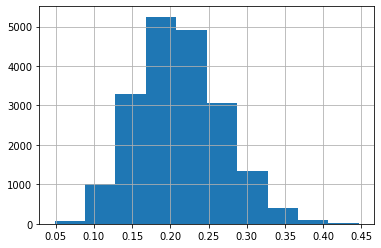

In [57]:
posteriors.hist();

In [60]:
rounded = posteriors.round(2)
mode = rounded.mode()

In [62]:
mode = mode[0]

In [63]:
mode

0.19

In [64]:
len(rounded[rounded == mode]) / len(rounded)

0.07166341313058666